## Initial

In [1]:
! pip install pyecharts

     |████████████████████████████████| 143kB 2.9MB/s 
     |████████████████████████████████| 133kB 25.2MB/s 


In [224]:
import pyecharts.options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Timeline, Grid, Bar, Map, Line, Boxplot, Scatter
from pyecharts.faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Load Data

In [261]:
happy_2015 = pd.read_csv("2015.csv")
# happy_2016 = pd.read_csv("2016.csv")
# happy_2017 = pd.read_csv("2017.csv")
# happy_2018 = pd.read_csv("2018.csv")
# happy_2019 = pd.read_csv("2019.csv")
# happy_2020 = pd.read_csv("2020.csv")
happy_910 = pd.read_csv("happiness_9&10.csv")
# happy_10c = pd.read_csv("happiness_10_complete.csv")

In [262]:
data = happy_910
years=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

In [263]:
data.head(10)

,Unnamed: 0,Country.name,year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,Positive.affect,Negative.affect
0,1,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
1,2,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
2,3,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
3,4,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
4,5,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
5,6,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
6,7,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371
7,8,Afghanistan,2018,2.694,7.692,0.508,52.60,0.374,-0.094,0.928,0.424,0.405
8,9,Afghanistan,2019,2.375,7.697,0.420,52.40,0.394,-0.108,0.924,0.351,0.502
9,10,Albania,2011,5.867,9.331,0.759,66.68,0.487,-0.205,0.877,0.628,0.257


## Map

In [265]:
datas=[]
for y in years:
    dict_year={}
    dict_year['time']=y
    data_list=[[i[1],i[2]] for i in data[data['year']==y][["Country.name", "Life.Ladder"]].itertuples()]
    dict_year['data']=data_list
    datas.append(dict_year)
    
print(datas)

[{'time': 2011, 'data': [['Afghanistan', 3.832], ['Albania', 5.867000000000001], ['Argentina', 6.776], ['Armenia', 4.26], ['Australia', 7.406000000000001], ['Austria', 7.471], ['Azerbaijan', 4.68], ['Bahrain', 4.824], ['Bangladesh', 4.986000000000001], ['Belarus', 5.225], ['Belgium', 7.111000000000001], ['Benin', 3.87], ['Bolivia', 5.779], ['Bosnia and Herzegovina', 4.995], ['Botswana', 3.52], ['Brazil', 7.037999999999999], ['Bulgaria', 3.875], ['Burkina Faso', 4.785], ['Cambodia', 4.1610000000000005], ['Cameroon', 4.434], ['Canada', 7.426], ['Chad', 4.393], ['Chile', 6.526], ['China', 5.037], ['Colombia', 6.4639999999999995], ['Congo (Brazzaville)', 4.51], ['Costa Rica', 7.229], ['Croatia', 5.385], ['Cyprus', 6.69], ['Czech Republic', 6.331], ['Denmark', 7.787999999999999], ['Dominican Republic', 5.397], ['Ecuador', 5.795], ['Egypt', 4.1739999999999995], ['El Salvador', 4.7410000000000005], ['Estonia', 5.487], ['Finland', 7.354], ['France', 6.959], ['Gabon', 4.255], ['Georgia', 4.203]

In [266]:
def get_year_chart(year:int, hist= True):
    map_data=[i['data'] for i in datas if i['time'] == year][0]
    map_all=map_data
    map_data = sorted(map_data, key=(lambda x: x[1]), reverse=True)[:10] # 关键点（对柱形图展示有帮助）

    if hist:
      min_data,max_data = (
          min([d[1] for d in map_data]),
          max([d[1] for d in map_data])
      )
    else:
      min_data,max_data = (
          min([d[1] for d in map_all]),
          max([d[1] for d in map_all])
      )

    # plot map
    map_chart = (
        Map(init_opts=opts.InitOpts(theme=ThemeType.DARK))
            .add(series_name='', data_pair=map_all,maptype="world")
            .set_global_opts(
            title_opts=opts.TitleOpts(
                title="{} Happiness Scores Around the World".format(year),
                pos_left="center",
                pos_top="top",
                title_textstyle_opts=opts.TextStyleOpts(font_size=40, color='white')
            ),
            visualmap_opts=opts.VisualMapOpts(min_=min_data,
                              max_=max_data,
                              pos_left="10",
                              pos_top="center",
                              range_text=["High", "Low"],
                              range_color=["lightskyblue", "yellow", "orangered"],
                              textstyle_opts=opts.TextStyleOpts(font_size=10,color="#ddd"),
                              dimension=0, 
                              )
        )
    )

    if hist:
      # hist plot
      bar_x_data=[x[0] for x in map_data]
      bar_y_data=[x[1] for x in map_data]
      bar = (
          Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
              .add_xaxis(xaxis_data=bar_x_data)
              .add_yaxis(
              series_name="",
              y_axis=bar_y_data,
              label_opts=opts.LabelOpts(
                  is_show=True, position="right", formatter="{b}: {c}"  # Complete label 
              )
          )
              .reversal_axis()
              .set_global_opts(
              visualmap_opts=opts.VisualMapOpts(
                  dimension=0,  
                  pos_left="10",
                  pos_top="center",
                  range_text=["High", "Low"],
                  range_color=["lightskyblue", "yellow", "red"],
                  textstyle_opts=opts.TextStyleOpts(font_size=10,color="#ddd"),
                  min_=min_data,
                  max_=max_data
              )
          )

      )
      # combine togethere
      grid_chart= (
          Grid()
          .add(bar,grid_opts=opts.GridOpts(pos_left="5",pos_right="75%", pos_top="65%", pos_bottom="20%"))
          .add(map_chart, grid_opts=opts.GridOpts(pos_left="5", pos_right="5", pos_top="1%", pos_bottom="0%"))
      )

      return grid_chart
    else:
      return map_chart


In [267]:
time_list = list(range(2011,2021))
timeline = Timeline(init_opts=opts.InitOpts(width="2000px", height="1100px", theme=ThemeType.DARK))

# Start to compile the time carousel
for y in time_list:
    g=get_year_chart(y)
    timeline.add(g,time_point=str(y))  

# time carousel setting
timeline.add_schema(
    orient="vertical",   # Type of timeline: vertical
    is_auto_play=True,   # Whether to play automatically
    is_inverse=True,     # Whether to place the timeline in the reverse direction
    play_interval=1000,   # Indicates the playback speed (jump interval), in milliseconds (ms)
    pos_left="null",
    pos_right="5",
    pos_top="20",
    pos_bottom="20",
    width="50", # The width of the timeline area
    label_opts=opts.LabelOpts(is_show=True, color="#fff",font_size=14), # Axis label configuration of the time axis
)

timeline.render('timeline_top10.html')

'/content/timeline_top10.html'

In [268]:
timeline = Timeline(init_opts=opts.InitOpts(width="2000px", height="1100px", theme=ThemeType.DARK))

# Start to compile the time carousel
for y in time_list:
    g=get_year_chart(y, hist=False)
    timeline.add(g,time_point=str(y))  

# time carousel setting
timeline.add_schema(
    orient="vertical",   # Type of timeline: vertical
    is_auto_play=True,   # Whether to play automatically
    is_inverse=True,     # Whether to place the timeline in the reverse direction
    play_interval=1000,   # Indicates the playback speed (jump interval), in milliseconds (ms)
    pos_left="null",
    pos_right="5",
    pos_top="20",
    pos_bottom="20",
    width="50", # The width of the timeline area
    label_opts=opts.LabelOpts(is_show=True, color="#fff",font_size=14), # Axis label configuration of the time axis
)

timeline.render('timeline_world.html')

'/content/timeline_world.html'

## Region

In [269]:
region = happy_2015[['Country','Region']].set_index('Country')
data = data.reset_index().set_index('Country.name')

region = data.join(region)

region.drop(['index','Unnamed: 0'], axis=1, inplace=True)
region.reset_index(inplace=True)

# region.loc[region['Region'].isnull()]  North Macedonia and Taiwan Province of China have NaN in Region

region.loc[region['index'] == 'North Macedonia', 'Region'] = 'Western Europe'
region.loc[region['index'] == 'Taiwan Province of China', 'Region'] = 'Eastern Asia'

region.head()

,index,year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,Positive.affect,Negative.affect,Region
0,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,Southern Asia
1,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,Southern Asia
2,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273,Southern Asia
3,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375,Southern Asia
4,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339,Southern Asia


## Longitude

In [279]:
region_name = list(set(region['Region'].to_list()))
region_mean = region[['Region', 'year', 'Life.Ladder']].groupby(['Region', 'year'], as_index=False).mean()
time_list = list(map(str, time_list))

line1=Line(init_opts=opts.InitOpts(width="2000px", height="1100px",theme=ThemeType.DARK))
    
line1.add_xaxis(time_list)

for n in region_name:
  y = region_mean.round(3).loc[region_mean['Region']==n, 'Life.Ladder'].to_list()
  line1.add_yaxis(series_name=n,
        y_axis=y,
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=True),
        symbol_size=6,
        )

line1.set_global_opts(
        tooltip_opts=opts.TooltipOpts(trigger="item"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
            min_ = 3.9,
            max_ = 7.5
        ),
        xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False, splitline_opts=opts.SplitLineOpts(is_show=True)),)

line1.render('Longitude.html')

'/content/Longitude.html'

## Region Distribution Boxplot

In [271]:
region2 = region.loc[:,['Region', 'year', 'Life.Ladder']]

region2.loc[region['Region'] == 'North America', 'Region'] = 'North America & ANZ'
region2.loc[region['Region'] == 'Australia and New Zealand', 'Region'] = 'North America & ANZ'

In [272]:
region_name = list(set(region2['Region'].to_list()))
region_name.remove('Southern Asia')
region_name.append('Southern Asia') # In 2020, only two data points in Southern Asia. Boxplot cannot show it.

time_list = list(map(str, time_list))

def box_plot(year):
  year = int(year)

  box=Boxplot(init_opts=opts.InitOpts(width="2200px", height="1000px", theme=ThemeType.DARK))
      
  box.add_xaxis(region_name)

  y = []
  for n in region_name:
    y.append(region2.loc[(region2['Region']==n) & (region2['year']==year), 'Life.Ladder'].round(3).to_list())
    
  box.add_yaxis(str(year), y_axis=box.prepare_data(y),)

  box.set_global_opts(
          tooltip_opts=opts.TooltipOpts(trigger="item"),
          yaxis_opts=opts.AxisOpts(
              type_="value",
              axistick_opts=opts.AxisTickOpts(is_show=True),
              splitline_opts=opts.SplitLineOpts(is_show=True),
              min_=2
          ),
          xaxis_opts=opts.AxisOpts(boundary_gap=True,
                      splitarea_opts=opts.SplitAreaOpts(is_show=True),
                      splitline_opts=opts.SplitLineOpts(is_show=True),
                      axistick_opts=opts.AxisTickOpts(is_show=False,is_align_with_label=False),
                      axislabel_opts=opts.LabelOpts(interval=0),
                      ),
  )
 
  return box

timeline = Timeline(init_opts=opts.InitOpts(width="2000px", height="1100px", theme=ThemeType.DARK))

# Start to compile the time carousel
for y in time_list:
    g=box_plot(y)
    timeline.add(g,time_point=str(y))  

# time carousel setting
timeline.add_schema(
    orient="vertical",   # Type of timeline: vertical
    is_auto_play=True,   # Whether to play automatically
    is_inverse=True,     # Whether to place the timeline in the reverse direction
    play_interval=1000,   # Indicates the playback speed (jump interval), in milliseconds (ms)
    pos_left="null",
    pos_right="5",
    pos_top="20",
    pos_bottom="20",
    width="50", # The width of the timeline area
    label_opts=opts.LabelOpts(is_show=True, color="#fff",font_size=14), # Axis label configuration of the time axis
)

timeline.render('region_distribution.html')

'/content/region_distribution.html'

## Correlations

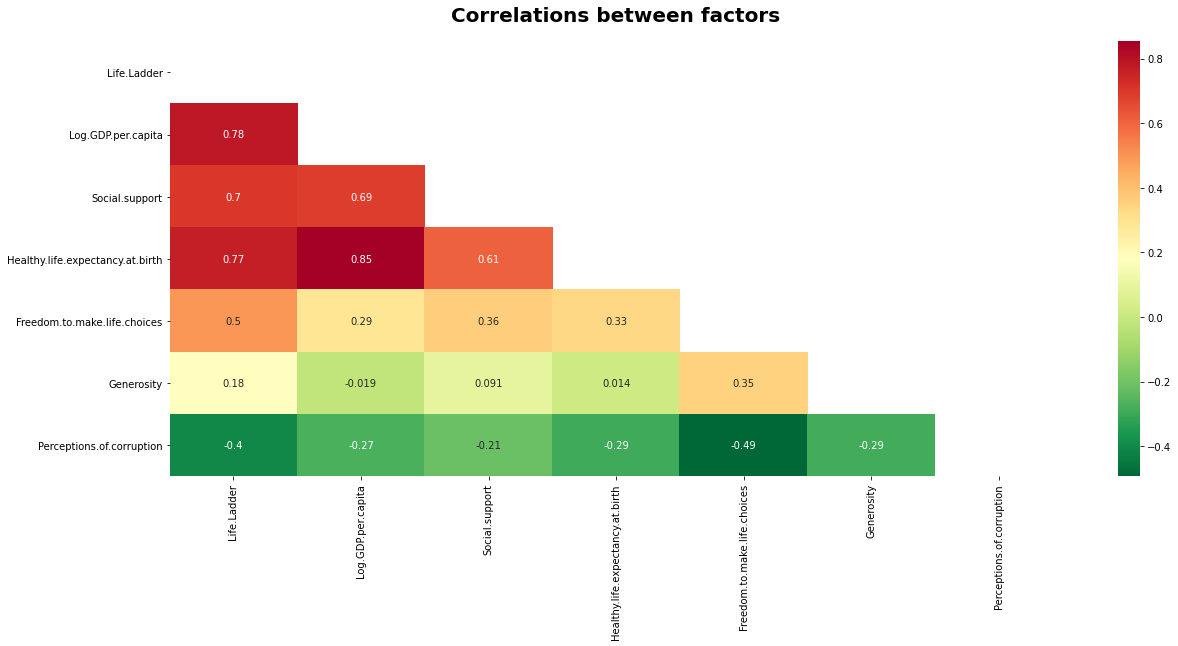

In [273]:

sns.set_palette('RdYlGn_r')

cols = data[['Life.Ladder', 'Log.GDP.per.capita','Social.support', 'Healthy.life.expectancy.at.birth',
       'Freedom.to.make.life.choices', 'Generosity','Perceptions.of.corruption']]

plt.figure(figsize=(20, 8))
sns.heatmap(cols.corr(), annot = True, cmap='RdYlGn_r', mask=np.triu(np.ones_like(cols.corr())));
plt.title('Correlations between factors', fontsize=20, fontweight='bold', pad=20);

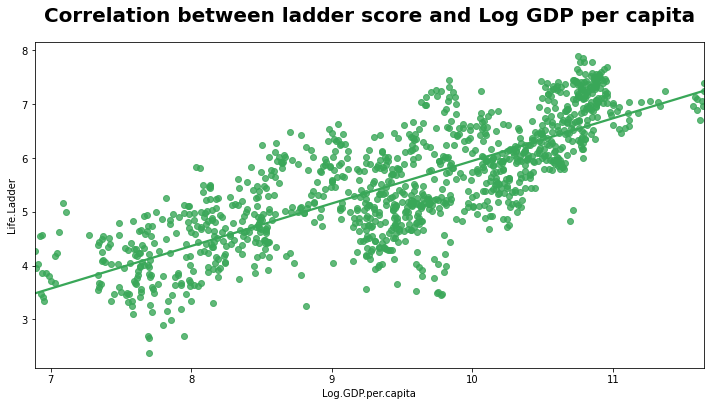

In [274]:
plt.figure(figsize=(12, 6))
sns.regplot( x='Log.GDP.per.capita',y='Life.Ladder', data=data, ci=None);
plt.title('Correlation between ladder score and Log GDP per capita', fontsize=20, fontweight='bold', pad=20);

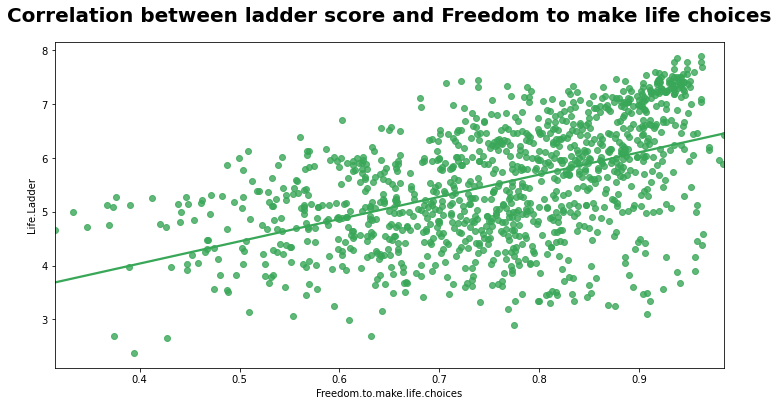

In [275]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Freedom.to.make.life.choices',y='Life.Ladder', data=data, ci=None);
plt.title('Correlation between ladder score and Freedom to make life choices', fontsize=20, fontweight='bold', pad=20);

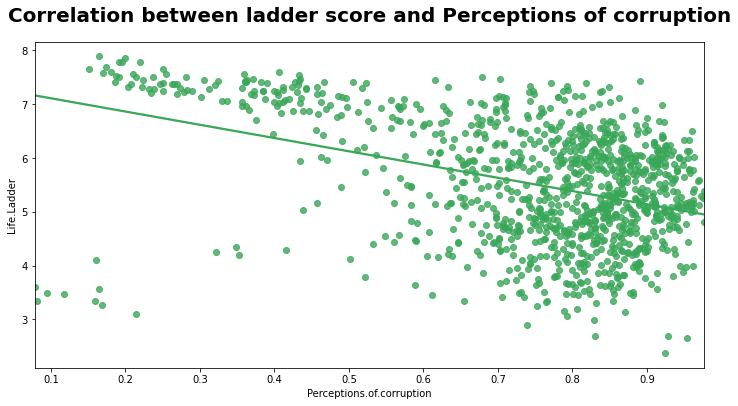

In [276]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Perceptions.of.corruption', y='Life.Ladder', data=data, ci=None);
plt.title('Correlation between ladder score and Perceptions of corruption', fontsize=20, fontweight='bold', pad=20);


## Variance

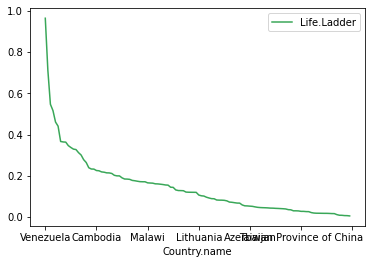

In [277]:
var_df = data.groupby(['Country.name'])['Life.Ladder'].var()
var_df = pd.DataFrame(var_df).sort_values(by='Life.Ladder', ascending=False)
var_df.plot()

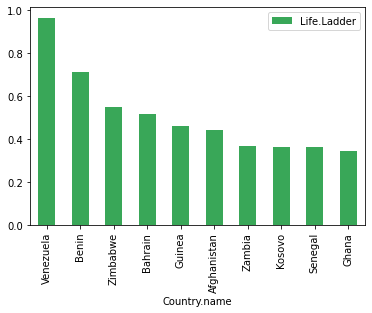

In [278]:
var_df.head(10).plot(kind='bar')